## Emotions Dataset

##### Load the Emotions dataset from the .csv file

In [2]:
import pandas as pd

emotions_file ='emotions.csv'
emotions = pd.read_csv(emotions_file)
emotions.columns

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


# 1. Binary Classification

1. Train a binary classifier (i.e., Stochastic Gradient Descent or Logistic Regression) of a particular emotion using any of the algorithms that are applicable. 
2. Use the following cross-validation methods:
        a. Standard cross-validation
        b. Stratified cross-validation
        c. Shuffle-split cross-validation
3. Show the confusion matrix table and graph.
4. Show the following graphs: 
        a. precision vs. recall 
        b. precision and recall as a function of threshold
5. Show the ROC curve
6. Train another classifier to compare the ROC curve and ROC AUC score of the previous classifier with. Show the ROC AUC scores of both classifiers.

In [3]:
emotions[:10]

,sampleNumber,pitchMin,pitchMax,pitchAve,energy,duration,f0,f1,f2,emotion
0,1,173.212996,445.069307,259.748404,0.035414,1.825438,1879.317977,4268.143612,0.000000,Happy
1,2,119.353521,238.914405,183.543182,0.043517,1.738500,900.280890,2731.501674,4608.552306,Happy
2,3,170.807263,342.086479,295.447784,0.022256,1.477688,1525.397375,2802.672926,0.000000,Happy
3,4,211.864117,525.138903,286.691254,0.045537,1.651563,1294.088000,2912.170591,0.000000,Happy
4,5,93.473578,431.444073,228.817661,0.014125,1.629813,834.168671,2306.635684,4616.595201,Happy
5,6,155.938598,443.155340,254.547109,0.018912,2.021000,1117.555325,3208.370833,0.000000,Happy
6,7,231.730777,480.429907,345.115637,0.020347,1.890625,834.624864,2532.988369,0.000000,Happy
7,8,142.991423,303.030825,237.587033,0.045782,1.760188,387.165614,2840.693438,4490.988124,Happy
8,9,76.194968,258.584773,198.690040,0.016199,1.564625,324.922925,2078.094377,3991.275354,Happy
9,10,215.282882,297.410103,253.092477,0.016345,1.108250,1447.367772,2167.261830,4232.900906,Happy


In [4]:
X = emotions.drop('emotion',axis=1)
y = emotions['emotion'] == "Happy"

print(y[:5])
# Only detect sad or happy

0    True
1    True
2    True
3    True
4    True
Name: emotion, dtype: bool


## Use SGD Classifier and Perform Cross Validation
Train a binary classifier (i.e., Stochastic Gradient Descent or Logistic Regression) of a particular emotion using any of the algorithms that are applicable. 

In [5]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=42)

**Get Cross val accuray**

***Standard Cross Validation***

In [6]:
# Standard Cross Validation

from sklearn.model_selection import cross_val_score
score_standard = cross_val_score(sgd, X, y, cv=5)
print("Scores: {}".format(score_standard))
print("Average score: {:.3f}".format(score_standard.mean()))

Scores: [0.84571429 0.87428571 0.85714286 0.85714286 0.85714286]
Average score: 0.858


***Stratified Cross-Validation***

In [7]:
from sklearn.model_selection import KFold
scores = cross_val_score(sgd, X, y, cv=KFold(n_splits = 5, shuffle=True, random_state=0))
print("Cross-validation scores: {}".format(scores))
print("Average score: {:.3f}".format(scores.mean()))

Cross-validation scores: [0.84642857 0.85       0.86285714 0.77428571 0.86      ]
Average score: 0.839


***Shuffle Splt Validation***

In [8]:
from sklearn.model_selection import ShuffleSplit
scores = cross_val_score(sgd, X, y, cv=ShuffleSplit(test_size=.5, train_size=.5, n_splits=10))
print("Cross-validation scors:\n {}".format(scores))
print("Average score: {:.2f}".format(scores.mean()))

Cross-validation scors:
 [0.85942857 0.82142857 0.148      0.67228571 0.87371429 0.84142857
 0.85428571 0.85057143 0.15142857 0.836     ]
Average score: 0.69


## Analysis

### Plot Precision and Recall

In [9]:
# Precision and Recall
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(sgd, X, y, cv=100, method="decision_function")

print(
"""=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
PRECISION VS RECALL
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=""")
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y, y_scores)
def plot_precision_recall(precisions, recall):
    plt.plot(recall,precisions,"b-")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.xlim([0,1])
    plt.ylim([0,1])
    
plot_precision_recall(precisions, recalls)
plt.show()
print(
"""=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
PRECISION VS RECALL as a function of THRESHOLD
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=""")
def plot_precision_recall_vs_threshold(precisions, recall, thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g-",label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0,1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

print(
"""=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
CONFUSION MATRIX AND GRAPH
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=""")
from sklearn.metrics import classification_report
y_pred = cross_val_predict(sgd, X, y, cv=3)

from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y, y_pred)
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()
print(classification_report(y, y_pred, target_names=["Happy","Not Happy"], digits=2))

print(
"""=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
ROC CURVE
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=""")
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
PRECISION VS RECALL
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


<Figure size 640x480 with 1 Axes>

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
PRECISION VS RECALL as a function of THRESHOLD
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


<Figure size 640x480 with 1 Axes>

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
CONFUSION MATRIX AND GRAPH
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


<Figure size 480x480 with 1 Axes>

             precision    recall  f1-score   support

      Happy       0.86      0.60      0.70      6000
  Not Happy       0.14      0.41      0.21      1000

avg / total       0.76      0.57      0.63      7000

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
ROC CURVE
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


<Figure size 640x480 with 1 Axes>

**Train another classifier (RANDOM FOREST)**
and compare with SGDClassfier

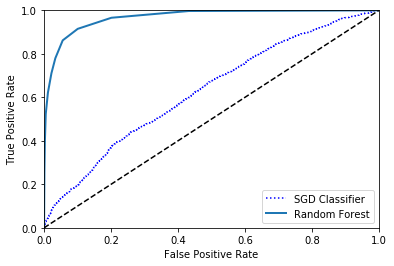

0.6282995
0.967477


In [10]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier()
y_probas_forest = cross_val_predict(forest_clf, X, y,
                                 cv=42,method="predict_proba")
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y,y_scores_forest)

plt.plot(fpr, tpr, "b:", label ="SGD Classifier")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y, y_scores))
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y, y_scores_forest))

# 2. Multiclass Classificaiton

1. Train one of these inherently binary classifiers (i.e., Stochastic Gradient Descent or Logistic Regression) on the training set using the original target labels. Then, predict using a particular instance. 
2. Show the decision scores of the 7 binary classifiers. Verify that it is indeed the displayed class.
3. Force the binary classifier to use a One-vs-One strategy. Both classifiers inherently use a One-vs-All strategy.
4. Train a KNN classifier, which is inherently multiclass, on the training set again using the original target labels. List the probabilities that the classifier assigned to each instance for each class.  
5. Evaluate the classifier's accuracy using cross validation.
6. Show the confusion matrix table and graph.

In [11]:
from sklearn.linear_model import SGDClassifier
sgd_multiclass = SGDClassifier(random_state=100)

# Override variable y with original labels.
X_multiclass = emotions.drop('emotion',axis=1)
y_multiclass = emotions['emotion']
#print(y_multiclass[:10]) #print actual labels
sgd_multiclass.fit(X_multiclass, y_multiclass)
#sgd_multiclass..decision_function([some_digit])(X_train)
sgd_multiclass.predict(X_multiclass[:1])

array(['Happy'], dtype='<U8')

In [12]:
print(sgd_multiclass.decision_function(X[:1]))

[[ -5946346.24165149 -11115096.88874598  -4017221.51503094
    8257636.6133046  -20155084.28813598   -791301.76858202
   -9841648.97323252]]


In [13]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(sgd_multiclass)
ovo_clf.fit(X_multiclass, y_multiclass)
ovo_clf.predict(X_multiclass[:10])

array(['Happy', 'Sad', 'Happy', 'Happy', 'Sad', 'Happy', 'Surprise',
       'Sad', 'Sad', 'Sad'], dtype=object)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_multiclass, y_multiclass)
knn.predict_proba(X[:3])

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]])

In [15]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(sgd, X_multiclass, y_multiclass, cv=5, scoring="accuracy")
print("SGD CV SCORE: {}".format(scores))
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X_multiclass, y_multiclass, cv=5, scoring="accuracy")
print("KNN CV SCORE: {}".format(scores))

SGD CV SCORE: [0.18571429 0.26       0.20428571 0.14857143 0.18285714]
KNN CV SCORE: [0.54357143 0.53857143 0.61714286 0.50357143 0.20071429]


SGD
             precision    recall  f1-score   support

      Angry  0.1573033708 0.1680000000 0.1624758221      1000
    Disgust  0.1659147870 0.3310000000 0.2210350584      1000
       Fear  0.2925170068 0.0430000000 0.0749782040      1000
      Happy  0.1171875000 0.0150000000 0.0265957447      1000
    Neutral  0.3702857143 0.6480000000 0.4712727273      1000
        Sad  0.0990783410 0.0430000000 0.0599721060      1000
   Surprise  0.2523680650 0.3730000000 0.3010492333      1000

avg / total  0.2078078264 0.2315714286 0.1881969851      7000



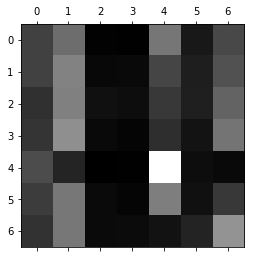

KNN
             precision    recall  f1-score   support

      Angry  0.5079928952 0.2860000000 0.3659628919      1000
    Disgust  0.7071129707 0.3380000000 0.4573748309      1000
       Fear  0.4488017429 0.2060000000 0.2823851953      1000
      Happy  0.2742653606 0.6160000000 0.3795440542      1000
    Neutral  0.2937249666 0.6600000000 0.4065291038      1000
        Sad  0.5919661734 0.2800000000 0.3801765105      1000
   Surprise  0.5636704120 0.3010000000 0.3924380704      1000

avg / total  0.4839335031 0.3838571429 0.3806300939      7000



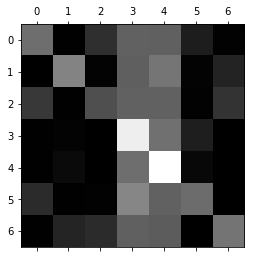

In [16]:
from sklearn.metrics import confusion_matrix
print("SGD")
y_multiclass_pred = cross_val_predict(ovo_clf, X_multiclass, y_multiclass, cv=3)
print(classification_report(y_multiclass, y_multiclass_pred, digits=10))
conf_mx = confusion_matrix(y_multiclass, y_multiclass_pred)
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

print("KNN")
y_multiclass_pred = cross_val_predict(knn, X_multiclass, y_multiclass, cv=3)
print(classification_report(y_multiclass, y_multiclass_pred, digits=10))
conf_mx = confusion_matrix(y_multiclass, y_multiclass_pred)
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

#### Multilabel Classification
1. Create a multilabel array containing two target labels for each instance: (1) Positive or Negative (2) original target label
2. Train a KNN classifier on the training set using the multilabel target array.
3. Make a prediction on the test set. 
3. Show the confusion matrix table and graph. 

In [31]:
import numpy as np
#dat1 = pd.DataFrame({'positive': [9,5]})

y_p = ((emotions["emotion"] == "Happy") | (emotions["emotion"] == "Surprise") | (emotions["emotion"] == "Neutral")).map(lambda x: "Positive" if x else "Negative")
y_multilabel = np.c_[emotions["emotion"]+", "+ y_p]
y_multilabel[:10]

array([['Happy, Positive'],
       ['Happy, Positive'],
       ['Happy, Positive'],
       ['Happy, Positive'],
       ['Happy, Positive'],
       ['Happy, Positive'],
       ['Happy, Positive'],
       ['Happy, Positive'],
       ['Happy, Positive'],
       ['Happy, Positive']], dtype=object)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X, y_multi)
knn.predict_proba(X[:3])

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]])

In [43]:
knn.predict(X[:3])
y_train_pred = cross_val_predict(knn, X, y_multilabel, cv=10)
print(classification_report(y_multilabel, y_train_pred, digits=1,label=["a","b"]))

                    precision    recall  f1-score   support

   Angry, Negative        0.4       0.6       0.5      1000
 Disgust, Negative        0.5       0.7       0.6      1000
    Fear, Negative        0.4       0.4       0.4      1000
   Happy, Positive        0.5       0.7       0.6      1000
 Neutral, Positive        0.5       0.5       0.5      1000
     Sad, Negative        0.6       0.2       0.3      1000
Surprise, Positive        0.6       0.3       0.4      1000

       avg / total        0.5       0.5       0.5      7000



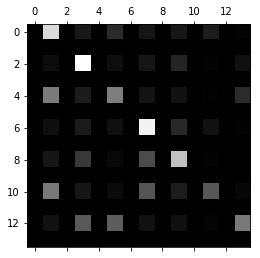

In [39]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(emotions['emotion'], y_train_pred)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()